<h1> fake news classification </h1>

DataSet :https://www.kaggle.com/c/fake-news/data#

In [1]:
#based level imports for data science work
import pandas as pd
import numpy as np 
import re,string
import pickle


#visualization libs
import seaborn as sb
from matplotlib import pyplot as plt


#NLP Libs
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


#lib for ML algos 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from time import time



In [2]:
dataset = pd.read_csv(r"C:\Users\LENOVO\Downloads\Fake-Reviews-Detection-main\train.csv")

In [3]:
dataset


id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [4]:
dataset=dataset.sample(5000)

In [5]:
dataset.shape

(5000, 5)

In [6]:
dataset=dataset.dropna()
dataset.shape

(4397, 5)

In [7]:
dataset=dataset.copy()

In [8]:
dataset.reset_index(inplace=True)

d:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


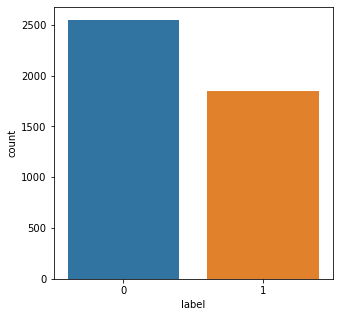

In [9]:
#cheacking distribution of real and fack news
plt.figure(figsize=(5,5))
sb.countplot(dataset.label);

In [10]:
dataset.head(3)

index     id                                              title  \
0  13741  13741  MONOPOLY: Banks, Then Media, Now Voting Machin...   
1  14438  14438  A Bullet Misses Its Mark, and Then Takes a Fat...   
2   9025   9025  Governments Turn to Commercial Spyware to Inti...   

                               author  \
0                             Kelen M   
1  Al Baker and James C. McKinley Jr.   
2                     Nicole Perlroth   

                                                text  label  
0  MONOPOLY: Banks, Then Media, Now Voting Machin...      1  
1  A   of   lead exploded from the barrel of a   ...      0  
2  SAN FRANCISCO  —   In the last five years, Ahm...      0

<h4>creating a datafream that will used in rest of work <h4>

In [11]:
#it is clear that if we include the 'author' coloumn in our futher exploration and anlysis it will have a significant impact 
#so we will need to drop it

In [12]:
#dataset['text']=dataset['title']+ " " +dataset['text']
#this will delete all the other coloumns we do not need for the rest of the work
del dataset['title']
del dataset['author']
del dataset['id']

In [13]:
dataset.head(5)

index                                               text  label
0  13741  MONOPOLY: Banks, Then Media, Now Voting Machin...      1
1  14438  A   of   lead exploded from the barrel of a   ...      0
2   9025  SAN FRANCISCO  —   In the last five years, Ahm...      0
3  20614  Ravish Kumar’s prime time show nominated for F...      1
4   4611  Click for full archive for ' Isle of Wight New...      1

In [14]:
#stemming process.......

In [15]:
def text_cleaning(data):
    corpus=[]
    for i in range(0,len(data)):
        clean_data=re.sub(r'\W',' ',str(data[i]))
        clean_data=clean_data.lower()
        clean_data=re.sub(r'\d+'," ",clean_data)
        clean_data=re.sub(r"[^a-zA-Z]",' ',clean_data)
        clean_data=re.sub(r'\s+',' ',clean_data)
        corpus.append(clean_data)
    return corpus

In [16]:
corpus=text_cleaning(dataset['text'])

In [17]:
#vectorization process.........

In [18]:
tf_vector=TfidfVectorizer(max_features=len(corpus),ngram_range=(1,2),stop_words=stopwords.words('english'))

In [19]:
tf_vector_matrix=tf_vector.fit_transform(corpus).todense()

In [20]:
#tf_vector_matrix

In [21]:
#getting dependend feature 
X=tf_vector_matrix

In [22]:
X.shape

(4397, 4397)

In [23]:
#getting dependent feature
Y=dataset['label']

In [24]:
#divide the data into Train and test
X_train, X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.30,random_state=0)

now we will apply many algorithms on this split data and cheack accuracy_scor and time taken by every model
and then we will select best one ......

<h2>  1 . KNN aldorithm</h2>

In [25]:
# Model training 
#time_s=time()
#KNN_model=KNeighborsClassifier()
#KNN_learner=KNN_model.fit(X_train,Y_train)
#time_end=time()
#tTime_KNN=time_end-time_s
#print("Learning time taken by KNN moldel is {}".format(tTime_KNN))

In [26]:
# Model prediction 
#time_s=time()
#prediction_KNN=KNN_learner.predict(X_test)
#acc_KNN=accuracy_score(prediction_KNN,Y_test)
#time_end=time()
#pTime_KNN=time_end-time_s
#print("Accuracy score of knn algo {} and time taken {}".format(acc_KNN,(pTime_KNN)))

In [27]:
#cm_KNN = confusion_matrix(Y_test,prediction_KNN)

In [28]:
#cm_KNN

In [29]:
#print(classification_report(Y_test,prediction_KNN))

<h2> 2. Logistic Regression algorithm</h2>

In [30]:
# Model training 
time_s=time()
LR_model=LogisticRegression()
LR_learner=LR_model.fit(X_train,Y_train)
time_end=time()
tTime_LR=time_end-time_s
print("Learning Time taken by LogisticRegression algo is {}".format(tTime_LR))

Learning Time taken by LogisticRegression algo is 10.445485830307007


In [31]:
# Model prediction 
time_s=time()
prediction_LR=LR_learner.predict(X_test)
acc_LR=accuracy_score(prediction_LR,Y_test)
time_end=time()
pTime_LR=time_end-time_s
print("Accuracy score of LR algo is:  {} and time taken {}".format(acc_LR,(pTime_LR)))

Accuracy score of LR algo is:  0.931060606060606 and time taken 0.1310281753540039


In [32]:
cm_LR = confusion_matrix(Y_test,prediction_LR)

In [33]:
cm_LR

array([[727,  38],
       [ 53, 502]], dtype=int64)

In [34]:
print(classification_report(Y_test,prediction_LR))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       765
           1       0.93      0.90      0.92       555

    accuracy                           0.93      1320
   macro avg       0.93      0.93      0.93      1320
weighted avg       0.93      0.93      0.93      1320



<h1> 3 . MultinomialNB(Naive Bayes) algorithm</h1>

In [35]:
## Model training 
#time_s=time()
#NB_model=MultinomialNB()
#NB_learner=NB_model.fit(X_train,Y_train)
#time_end=time()
#tTime_NB=time_end-time_s
#print("Learning Time taken by MultinomialNB algo is {}".format(tTime_NB))

In [36]:
## Model prediction 
#time_s=time()
#prediction_NB=NB_learner.predict(X_test)
#=accuracy_score(prediction_NB,Y_test)
#time_end=time()
#pTime_NB=time_end-time_s
#pTime_LR=time_end-time_s
#print("Accuracy score of NB algo is:  {} and time taken {}".format(acc_NB,(pTime_NB)))

In [37]:
#cm_NB = confusion_matrix(Y_test,prediction_NB)

In [38]:
#cm_NB

In [39]:
#print(classification_report(Y_test,prediction_NB))

<h1> 4 . Bagging Classifier (Decision tree) algorithm</h1>

In [40]:
# Model training 
#time_s=time()
#DT_model= DecisionTreeClassifier()
#DT_learner=DT_model.fit(X_train, Y_train)
#t#ime_end=time()
#=time_end-time_s
#print("Learning Time taken by Decision tree algo is {}".format(tTime_DT))

In [41]:
## Model prediction 
#time_s=time()
#prediction_DT=DT_learner.predict(X_test)
#acc_DT=accuracy_score(prediction_DT,Y_test)
#time_end=time()
#pTime_DT=time_end-time_s
#pTime_LR=time_end-time_s
#print("Accuracy score of decision tree algo is:  {} and time taken {}".format(acc_DT,(pTime_DT)))

In [42]:
#cm_DT = confusion_matrix(Y_test,prediction_DT)

In [43]:
#cm_DT

In [44]:
#print(classification_report(Y_test,prediction_DT))

<h3>Now.. we will compair and visualiese accuracy_scor , training_time , testing_time of all algorithm </h3>

In [45]:
#now we will create a dictionary for time and accuracsy scor of all algo
#dict1={
#    "Algorithm":['KNN','Logistic Reggression','MultinomialNB','Bagging Classifier'],
#    "Accurasy_Score":[acc_KNN , acc_LR, acc_NB , acc_DT],
#    "Prediction Time":[pTime_KNN, pTime_LR , pTime_NB , pTime_DT],
#    "Trainning Time":[tTime_KNN, tTime_LR , tTime_NB , tTime_DT]
#}
   

In [46]:
##converting dictionary into datafream to create a table for every algo's performance 
#performance_df=pd.DataFrame(dict1)

In [47]:
#performance_df

In [48]:
#plt.figure(figsize=(20,5))
#plt.subplot(1,3,1)
#sb.barplot(x='Algorithm',y='Accurasy_Score',hue="Algorithm",data=performance_df)
#plt.subplot(1,3,2)
#sb.barplot(x='Algorithm',y='Prediction Time',hue="Algorithm",data=performance_df)
#plt.subplot(1,3,3)
#sb.barplot(x='Algorithm',y='Trainning Time',hue="Algorithm",data=performance_df)

Now it is clear that <b>logistic regression algorithm</b> is best fit for our model
because it gives best <b>accuracy score 96%</b>

<h3>Now we will create pkl file for <h3>

In [49]:
pickle.dump(LR_model,open('model.pkl','wb'))

In [50]:
#load the model from disk
loaded_model = pickle.load(open('model.pkl','rb'))

In [51]:
pickle.dump(tf_vector,open('vector.pkl','wb'))